# Project - Life Expectancy Prediction for WHO using Linear Regression 


In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

In [2]:
df = pd.read_csv("Life Expectancy Data .csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [6]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


In [9]:
df.isna()

Country   Year  Status  Life expectancy   Adult Mortality  \
0       False  False   False             False            False   
1       False  False   False             False            False   
2       False  False   False             False            False   
3       False  False   False             False            False   
4       False  False   False             False            False   
...       ...    ...     ...               ...              ...   
2933    False  False   False             False            False   
2934    False  False   False             False            False   
2935    False  False   False             False            False   
2936    False  False   False             False            False   
2937    False  False   False             False            False   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             False    False                   False        False     False   
1             False    False                   False        False     False   
2             False    False                   False        False     False   
3             False    False                   False        False     False   
4             False    False                   False        False     False   
...             ...      ...                     ...          ...       ...   
2933          False    False                   False        False     False   
2934          False    False                   False        False     False   
2935          False    False                   False        False     False   
2936          False    False                   False        False     False   
2937          False    False                   False        False     False   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0     False               False  False              False        False   
1     False               False  False              False        False   
2     False               False  False              False        False   
3     False               False  False              False        False   
4     False               False  False              False        False   
...     ...                 ...    ...                ...          ...   
2933  False               False  False              False        False   
2934  False               False  False              False        False   
2935  False               False  False              False        False   
2936  False               False  False              False        False   
2937  False               False  False              False        False   

       HIV/AIDS    GDP  Population   thinness  1-19 years  \
0         False  False       False                  False   
1         False  False       False                  False   
2         False  False       False                  False   
3         False  False       False                  False   
4         False  False       False                  False   
...         ...    ...         ...                    ...   
2933      False  False       False                  False   
2934      False  False       False                  False   
2935      False  False       False                  False   
2936      False  False       False                  False   
2937      False  False       False                  False   

       thinness 5-9 years  Income composition of resources  Schooling  
0                   False                            False      False  
1                   False                            False      False  
2                   False                            False      False  
3                   False                            False      False  
4                   False                            False      False  
...                   ...                              ...        ...  
2933                False                            False      False  
2934                False                            F

# Data preprocessing


In [11]:
df= df.rename(columns=lambda x: x.strip())

In [12]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


In [13]:
label_encoder= preprocessing.LabelEncoder()
df['Status']=label_encoder.fit_transform(df['Status'])

In [14]:
df.head(10)

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   
5  Afghanistan  2010       1             58.8            279.0             74   
6  Afghanistan  2009       1             58.6            281.0             77   
7  Afghanistan  2008       1             58.1            287.0             80   
8  Afghanistan  2007       1             57.5            295.0             82   
9  Afghanistan  2006       1             57.3            295.0             84   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   
5     0.01               79.679367         66.0     1989  16.7   
6     0.01               56.762217         63.0     2861  16.2   
7     0.03               25.873925         64.0     1599  15.7   
8     0.02               10.910156         63.0     1141  15.2   
9     0.03               17.171518         64.0     1990  14.7   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   
5                102   66.0               9.20        66.0       0.1   
6                106   63.0               9.42        63.0       0.1   
7                110   64.0               8.33        64.0       0.1   
8                113   63.0               6.73        63.0       0.1   
9                116   58.0               7.43        58.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   
5  553.328940   2883167.0                  18.4                18.4   
6  445.893298    284331.0                  18.6                18.7   
7  373.361116   2729431.0                  18.8                18.9   
8  369.835796  26616792.0                  19.0                19.1   
9  272.563770   2589345.0                  19.2                19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int32  
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [17]:
df['Status'].unique()

array([1, 0])

In [18]:
df.head(5)

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       1             65.0            263.0             62   
1  Afghanistan  2014       1             59.9            271.0             64   
2  Afghanistan  2013       1             59.9            268.0             66   
3  Afghanistan  2012       1             59.5            272.0             69   
4  Afghanistan  2011       1             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  \
0     0.01               71.279624         65.0     1154  19.1   
1     0.01               73.523582         62.0      492  18.6   
2     0.01               73.219243         64.0      430  18.1   
3     0.01               78.184215         67.0     2787  17.6   
4     0.01                7.097109         68.0     3013  17.2   

   under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness  1-19 years  thinness 5-9 years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [19]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
df.shape

(2938, 22)

In [23]:
#replace using mean
for i in df.columns.drop('Country'):
    df[i].fillna(df[i].mean() ,inplace = True)

In [27]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

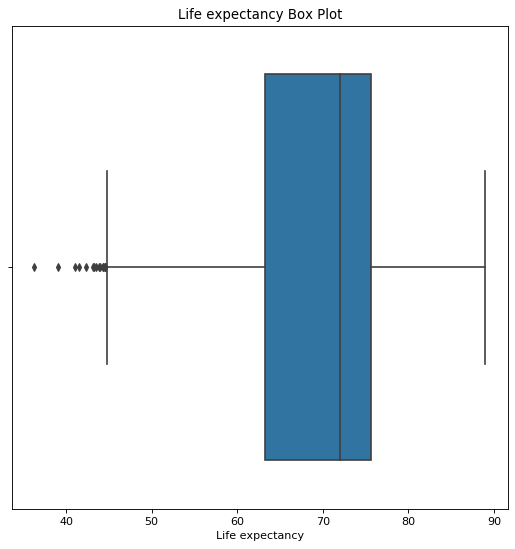

In [28]:
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['Life expectancy'])
plt.title('Life expectancy Box Plot')
plt.show()

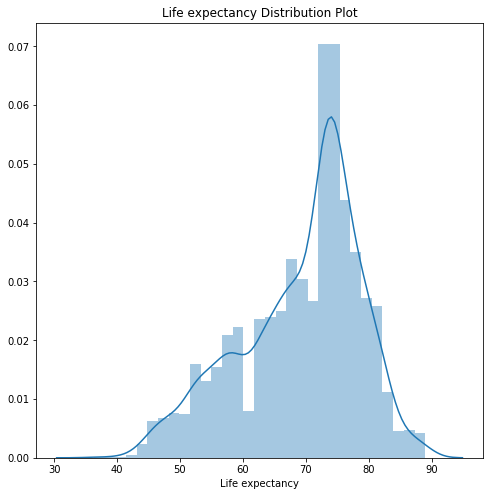

In [30]:
plt.figure(figsize=(8,8))
plt.title('Life expectancy Distribution Plot')
sns.distplot(df['Life expectancy'])

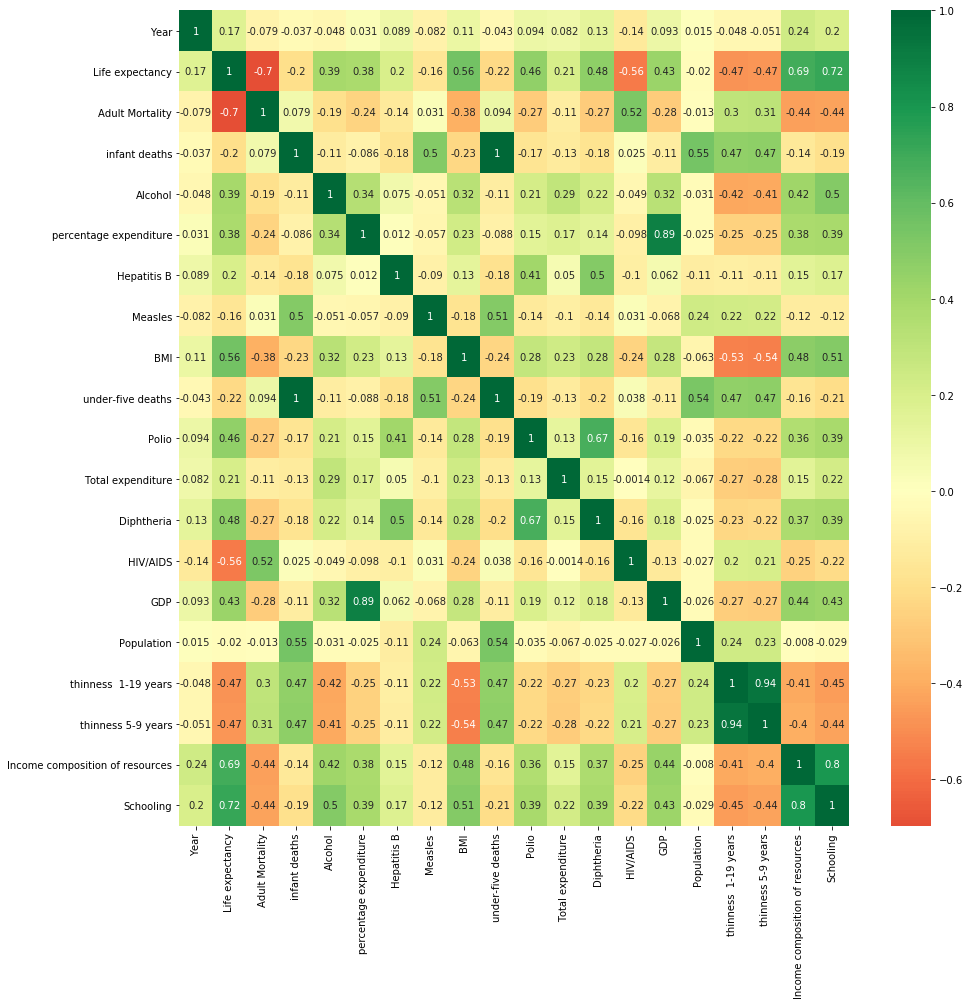

In [32]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

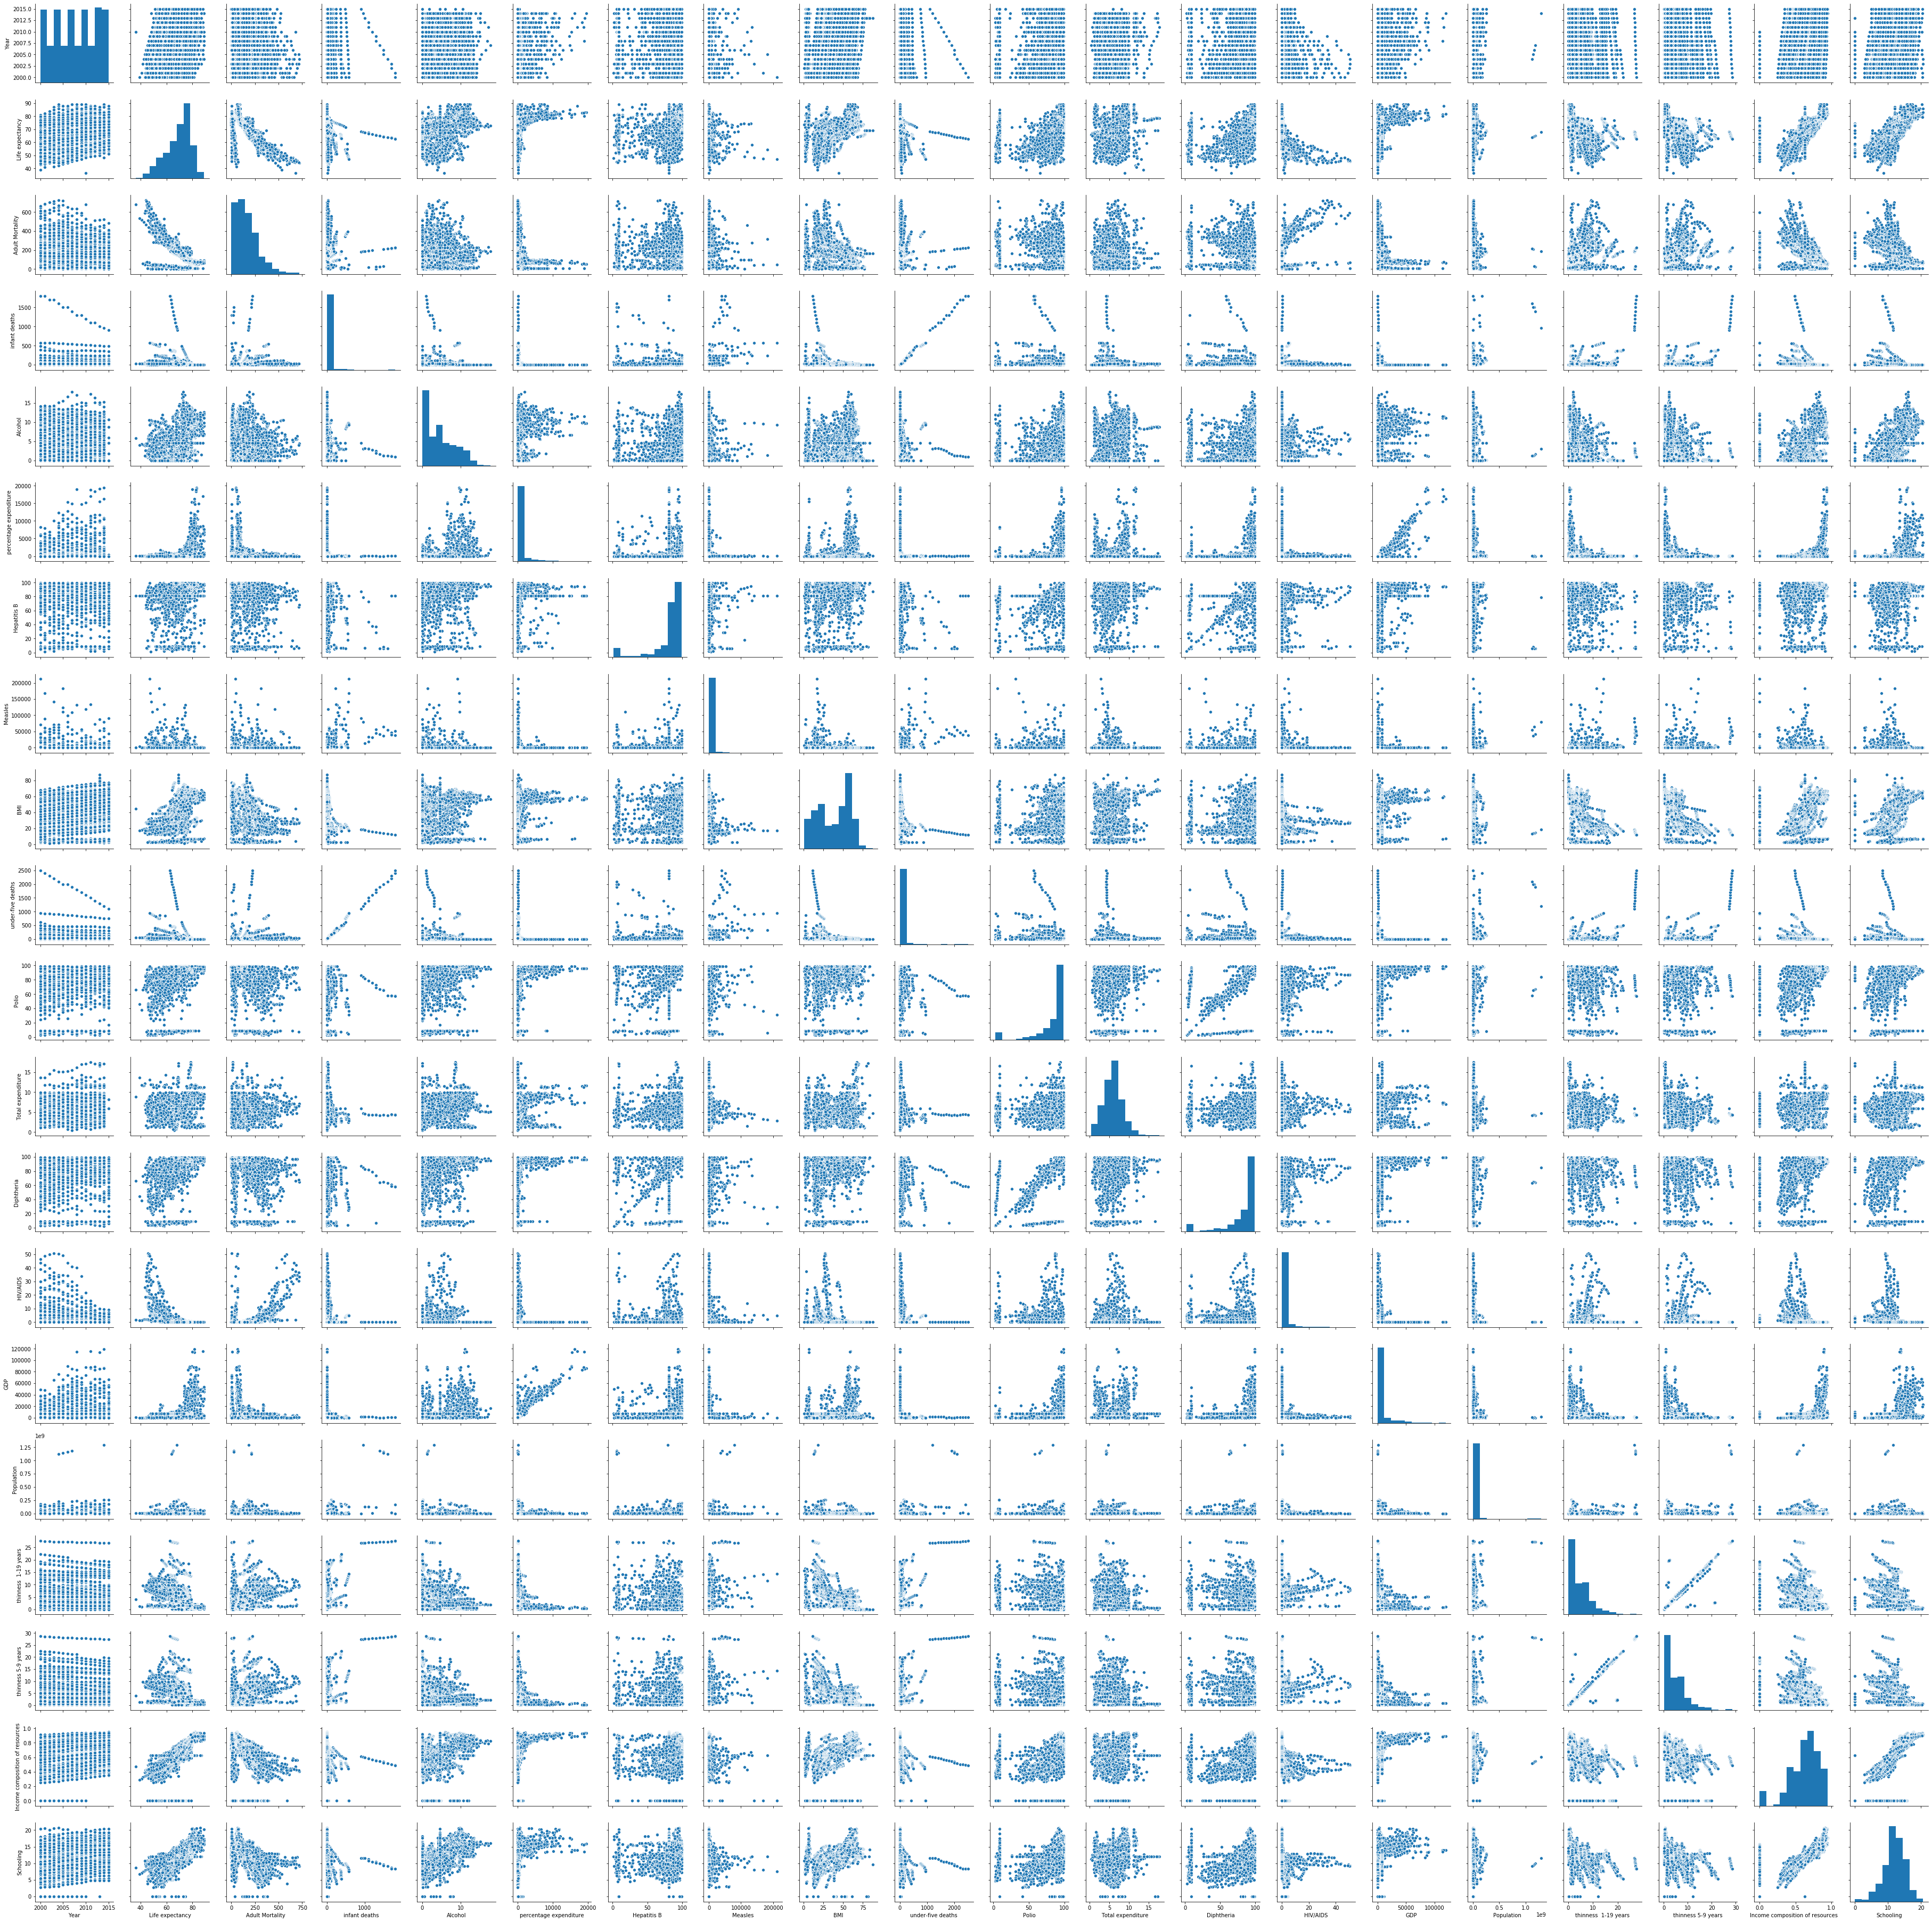

In [34]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(df[num_col])